### Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pickle

bp_df = pd.read_csv('Contextual_test_BPClass_samepatient.csv')
bg_df = pd.read_csv('Contextual_test_BGClass_samepatient.csv')
bpbg_df = pd.read_csv('Contextual_test_BPBGClass_samepatient.csv')


with open('samepatient_maskid.pkl', 'rb') as f:
    same_patient = pickle.load(f)

print(bp_df.shape)
print(bg_df.shape)
print(bpbg_df.shape)

(71180, 23)
(71180, 23)
(71180, 23)


Remove the patients with extremly large baseline BMI in BG and BPBG data!

In [2]:
bp_df = bp_df[bp_df['baseline_BMI'] < 100 ]
bg_df = bg_df[bg_df['baseline_BMI'] < 100 ]
bpbg_df = bpbg_df[bpbg_df['baseline_BMI'] < 100 ]

print(bp_df.shape)
print(bg_df.shape)
print(bpbg_df.shape)

(71180, 23)
(71180, 23)
(71180, 23)


## Table 1 - Inconsistent

In [3]:
print(bpbg_df.columns)

Index(['MaskId', 'Visit_num', 'baseline_age', 'female', 'race_whiteother',
       'edu_baseline_1', 'edu_baseline_2', 'edu_baseline_3', 'cvd_hx_baseline',
       'baseline_BMI', 'cigarett_baseline_1', 'state_code', 'action_code',
       'med_list', 'sbp_fb', 'hba1c_fb', 'cvdrisk_fb', 'state_code_cln',
       'action_code_cln', 'med_list_cln', 'sbp_fb_cln', 'hba1c_fb_cln',
       'cvdrisk_fb_cln'],
      dtype='object')


In [4]:
def check_inconsistent_data(df, flag):

    print()
    print('---{}---'.format(flag))
    df_len = df.shape[0]
    print('df.shape: ', df.shape)

    # select rows with inconsistent `action_code` and `action_code_cln`
    inconsistent_df = df.loc[df['action_code'] != df['action_code_cln']]
    print('inconsistent_df.shape: ', inconsistent_df.shape)

    inconsistent_df_len = inconsistent_df.shape[0]

    print('{:.2f}'.format(inconsistent_df_len / df_len * 100))

    if flag == 'bp':
        sbp_fb_mean, sbp_fb_std = inconsistent_df['sbp_fb'].mean(), inconsistent_df['sbp_fb'].std()
        sbp_fb_cln_mean, sbp_fb_cln_std = inconsistent_df['sbp_fb_cln'].mean(), inconsistent_df['sbp_fb_cln'].std()
        sbp_fb_140 = inconsistent_df.loc[inconsistent_df['sbp_fb'] >= 130].shape[0]
        sbp_fb_140_cln = inconsistent_df.loc[inconsistent_df['sbp_fb_cln'] >= 130].shape[0]
        print('{:.2f}({:.2f})\t{:.2f}({:.2f})'.format(sbp_fb_mean, sbp_fb_std, sbp_fb_cln_mean, sbp_fb_cln_std))
        print('{:.2f}({:.2f})\t{:.2f}({:.2f})'.format(sbp_fb_140, sbp_fb_140/inconsistent_df_len*100, sbp_fb_140_cln, sbp_fb_140_cln/inconsistent_df_len*100))

        cvdrisk_fb_mean, cvdrisk_fb_std = inconsistent_df['cvdrisk_fb'].mean(), inconsistent_df['cvdrisk_fb'].std()
        cvdrisk_fb_cln_mean, cvdrisk_fb_cln_std = inconsistent_df['cvdrisk_fb_cln'].mean(), inconsistent_df['cvdrisk_fb_cln'].std()
        cvdrisk_fb_20 = inconsistent_df.loc[inconsistent_df['cvdrisk_fb'] >= 0.2].shape[0]
        cvdrisk_fb_20_cln = inconsistent_df.loc[inconsistent_df['cvdrisk_fb_cln'] >= 0.2].shape[0]
        print('{:.4f}({:.4f})\t{:.4f}({:.4f})'.format(cvdrisk_fb_mean, cvdrisk_fb_std, cvdrisk_fb_cln_mean, cvdrisk_fb_cln_std))
        print('{:.4f}({:.4f})\t{:.4f}({:.4f})'.format(cvdrisk_fb_20, cvdrisk_fb_20/inconsistent_df_len*100, cvdrisk_fb_20_cln, cvdrisk_fb_20_cln/inconsistent_df_len*100))

    
    if flag == 'bg':
        hba1c_fb_mean, hba1c_fb_std = inconsistent_df['hba1c_fb'].mean(), inconsistent_df['hba1c_fb'].std()
        hba1c_fb_cln_mean, hba1c_fb_cln_std = inconsistent_df['hba1c_fb_cln'].mean(), inconsistent_df['hba1c_fb_cln'].std()
        hba1c_fb_8 = inconsistent_df.loc[inconsistent_df['hba1c_fb'] >= 7.99].shape[0]
        hba1c_fb_8_clb = inconsistent_df.loc[inconsistent_df['hba1c_fb_cln'] >= 7.99].shape[0]
        print('{:.2f}({:.2f})\t{:.2f}({:.2f})'.format(hba1c_fb_mean, hba1c_fb_std, hba1c_fb_cln_mean, hba1c_fb_cln_std))
        print('{:.2f}({:.2f})\t{:.2f}({:.2f})'.format(hba1c_fb_8, hba1c_fb_8/inconsistent_df_len*100, hba1c_fb_8_clb, hba1c_fb_8_clb/inconsistent_df_len*100))

        cvdrisk_fb_mean, cvdrisk_fb_std = inconsistent_df['cvdrisk_fb'].mean(), inconsistent_df['cvdrisk_fb'].std()
        cvdrisk_fb_cln_mean, cvdrisk_fb_cln_std = inconsistent_df['cvdrisk_fb_cln'].mean(), inconsistent_df['cvdrisk_fb_cln'].std()
        cvdrisk_fb_20 = inconsistent_df.loc[inconsistent_df['cvdrisk_fb'] >= 0.2].shape[0]
        cvdrisk_fb_20_cln = inconsistent_df.loc[inconsistent_df['cvdrisk_fb_cln'] >= 0.2].shape[0]
        print('{:.4f}({:.4f})\t{:.4f}({:.4f})'.format(cvdrisk_fb_mean, cvdrisk_fb_std, cvdrisk_fb_cln_mean, cvdrisk_fb_cln_std))
        print('{:.4f}({:.4f})\t{:.4f}({:.4f})'.format(cvdrisk_fb_20, cvdrisk_fb_20/inconsistent_df_len*100, cvdrisk_fb_20_cln, cvdrisk_fb_20_cln/inconsistent_df_len*100))

    if flag == 'bpbg':

        sbp_fb_mean, sbp_fb_std = inconsistent_df['sbp_fb'].mean(), inconsistent_df['sbp_fb'].std()
        sbp_fb_cln_mean, sbp_fb_cln_std = inconsistent_df['sbp_fb_cln'].mean(), inconsistent_df['sbp_fb_cln'].std()
        sbp_fb_140 = inconsistent_df.loc[inconsistent_df['sbp_fb'] >= 130].shape[0]
        sbp_fb_140_cln = inconsistent_df.loc[inconsistent_df['sbp_fb_cln'] >= 130].shape[0]
        print('{:.2f}({:.2f})\t{:.2f}({:.2f})'.format(sbp_fb_mean, sbp_fb_std, sbp_fb_cln_mean, sbp_fb_cln_std))
        print('{:.2f}({:.2f})\t{:.2f}({:.2f})'.format(sbp_fb_140, sbp_fb_140/inconsistent_df_len*100, sbp_fb_140_cln, sbp_fb_140_cln/inconsistent_df_len*100))

        hba1c_fb_mean, hba1c_fb_std = inconsistent_df['hba1c_fb'].mean(), inconsistent_df['hba1c_fb'].std()
        hba1c_fb_cln_mean, hba1c_fb_cln_std = inconsistent_df['hba1c_fb_cln'].mean(), inconsistent_df['hba1c_fb_cln'].std()
        hba1c_fb_8 = inconsistent_df.loc[inconsistent_df['hba1c_fb'] >= 7.99].shape[0]
        hba1c_fb_8_clb = inconsistent_df.loc[inconsistent_df['hba1c_fb_cln'] >= 7.99].shape[0]
        print('{:.2f}({:.2f})\t{:.2f}({:.2f})'.format(hba1c_fb_mean, hba1c_fb_std, hba1c_fb_cln_mean, hba1c_fb_cln_std))
        print('{:.2f}({:.2f})\t{:.2f}({:.2f})'.format(hba1c_fb_8, hba1c_fb_8/inconsistent_df_len*100, hba1c_fb_8_clb, hba1c_fb_8_clb/inconsistent_df_len*100))

        cvdrisk_fb_mean, cvdrisk_fb_std = inconsistent_df['cvdrisk_fb'].mean(), inconsistent_df['cvdrisk_fb'].std()
        cvdrisk_fb_cln_mean, cvdrisk_fb_cln_std = inconsistent_df['cvdrisk_fb_cln'].mean(), inconsistent_df['cvdrisk_fb_cln'].std()
        cvdrisk_fb_20 = inconsistent_df.loc[inconsistent_df['cvdrisk_fb'] >= 0.2].shape[0]
        cvdrisk_fb_20_cln = inconsistent_df.loc[inconsistent_df['cvdrisk_fb_cln'] >= 0.2].shape[0]
        print('{:.4f}({:.4f})\t{:.4f}({:.4f})'.format(cvdrisk_fb_mean, cvdrisk_fb_std, cvdrisk_fb_cln_mean, cvdrisk_fb_cln_std))
        print('{:.4f}({:.4f})\t{:.4f}({:.4f})'.format(cvdrisk_fb_20, cvdrisk_fb_20/inconsistent_df_len*100, cvdrisk_fb_20_cln, cvdrisk_fb_20_cln/inconsistent_df_len*100))  
    
check_inconsistent_data(bp_df, 'bp')
check_inconsistent_data(bg_df, 'bg')
check_inconsistent_data(bpbg_df, 'bpbg')


---bp---
df.shape:  (71180, 23)
inconsistent_df.shape:  (66586, 23)
93.55
125.22(2.77)	126.20(2.74)
3870.00(5.81)	6019.00(9.04)
0.2177(0.1229)	0.2203(0.1232)
30946.0000(46.4752)	31337.0000(47.0624)

---bg---
df.shape:  (71180, 23)
inconsistent_df.shape:  (67608, 23)
94.98
7.02(0.26)	7.12(0.27)
0.00(0.00)	0.00(0.00)
0.2199(0.1191)	0.2214(0.1195)
32146.0000(47.5476)	32430.0000(47.9677)

---bpbg---
df.shape:  (71180, 23)
inconsistent_df.shape:  (65547, 23)
92.09
125.34(2.51)	126.35(2.73)
2984.00(4.55)	6483.00(9.89)
7.32(0.28)	7.16(0.33)
42.00(0.06)	185.00(0.28)
0.2162(0.1193)	0.2197(0.1205)
30295.0000(46.2187)	30928.0000(47.1845)


## Table 2 - Demographics

In [12]:
def check_demographics(bp_df, bg_df, bpbg_df):


    # select rows with inconsistent `action_code` and `action_code_cln`
    bp_incons_df = bp_df.loc[bp_df['action_code'] != bp_df['action_code_cln']]
    bg_incons_df = bg_df.loc[bg_df['action_code'] != bg_df['action_code_cln']]
    bpbg_incons_df = bpbg_df.loc[bpbg_df['action_code'] != bpbg_df['action_code_cln']]

    bp_cons_df = bp_df.loc[bp_df['action_code'] == bp_df['action_code_cln']]
    bg_cons_df = bg_df.loc[bg_df['action_code'] == bg_df['action_code_cln']]
    bpbg_cons_df = bpbg_df.loc[bpbg_df['action_code'] == bpbg_df['action_code_cln']]

    print("No/Yes %")
    print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
        bp_incons_df.shape[0]/bp_df.shape[0]*100, bp_cons_df.shape[0]/bp_df.shape[0]*100,
        bg_incons_df.shape[0]/bg_df.shape[0]*100, bg_cons_df.shape[0]/bg_df.shape[0]*100,
        bpbg_incons_df.shape[0]/bpbg_df.shape[0]*100, bpbg_cons_df.shape[0]/bpbg_df.shape[0]*100
    ))
    print()

    # print the average value of `baseline_age` in each consistent/inconsistent group
    print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
        bp_incons_df['baseline_age'].mean(), bp_cons_df['baseline_age'].mean(),
        bg_incons_df['baseline_age'].mean(), bg_cons_df['baseline_age'].mean(),
        bpbg_incons_df['baseline_age'].mean(), bpbg_cons_df['baseline_age'].mean()
    ))

    # print the average value of `female` in each consistent/inconsistent group
    print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
        bp_incons_df['female'].mean()*100, bp_cons_df['female'].mean()*100,
        bg_incons_df['female'].mean()*100, bg_cons_df['female'].mean()*100,
        bpbg_incons_df['female'].mean()*100, bpbg_cons_df['female'].mean()*100
    ))
    print()

    # print the average value of `race_whiteother` in each consistent/inconsistent group
    print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
        bp_incons_df['race_whiteother'].mean()*100, bp_cons_df['race_whiteother'].mean()*100,
        bg_incons_df['race_whiteother'].mean()*100, bg_cons_df['race_whiteother'].mean()*100,
        bpbg_incons_df['race_whiteother'].mean()*100, bpbg_cons_df['race_whiteother'].mean()*100
    ))
      
    print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
        (1-bp_incons_df['race_whiteother'].mean())*100, (1-bp_cons_df['race_whiteother'].mean())*100,
        (1-bg_incons_df['race_whiteother'].mean())*100, (1-bg_cons_df['race_whiteother'].mean())*100,
        (1-bpbg_incons_df['race_whiteother'].mean())*100, (1-bpbg_cons_df['race_whiteother'].mean())*100
    ))

    # print the average value of `cvd_hx_baseline` in each consistent/inconsistent group
    print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
        bp_incons_df['cvd_hx_baseline'].mean()*100, bp_cons_df['cvd_hx_baseline'].mean()*100,
        bg_incons_df['cvd_hx_baseline'].mean()*100, bg_cons_df['cvd_hx_baseline'].mean()*100,
        bpbg_incons_df['cvd_hx_baseline'].mean()*100, bpbg_cons_df['cvd_hx_baseline'].mean()*100
    ))

    # print the average value of `cigarett_baseline_1` in each consistent/inconsistent group
    print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
        bp_incons_df['cigarett_baseline_1'].mean()*100, bp_cons_df['cigarett_baseline_1'].mean()*100,
        bg_incons_df['cigarett_baseline_1'].mean()*100, bg_cons_df['cigarett_baseline_1'].mean()*100,
        bpbg_incons_df['cigarett_baseline_1'].mean()*100, bpbg_cons_df['cigarett_baseline_1'].mean()*100
    ))

    # print the average value of `baseline_BMI` in each consistent/inconsistent group
    print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
        bp_incons_df['baseline_BMI'].mean(), bp_cons_df['baseline_BMI'].mean(),
        bg_incons_df['baseline_BMI'].mean(), bg_cons_df['baseline_BMI'].mean(),
        bpbg_incons_df['baseline_BMI'].mean(), bpbg_cons_df['baseline_BMI'].mean()
    ))

    # print the average value of `sbp_fb` in each consistent/inconsistent group
    print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
        bp_incons_df['sbp_fb'].mean(), bp_cons_df['sbp_fb'].mean(),
        bg_incons_df['sbp_fb'].mean(), bg_cons_df['sbp_fb'].mean(),
        bpbg_incons_df['sbp_fb'].mean(), bpbg_cons_df['sbp_fb'].mean()
    ))

    # print the average value of `hba1c_fb` in each consistent/inconsistent group
    print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
        bp_incons_df['hba1c_fb'].mean(), bp_cons_df['hba1c_fb'].mean(),
        bg_incons_df['hba1c_fb'].mean(), bg_cons_df['hba1c_fb'].mean(),
        bpbg_incons_df['hba1c_fb'].mean(), bpbg_cons_df['hba1c_fb'].mean()
    ))

    # print the average value of `cvdrisk_fb` in each consistent/inconsistent group
    print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
        bp_incons_df['cvdrisk_fb'].mean(), bp_cons_df['cvdrisk_fb'].mean(),
        bg_incons_df['cvdrisk_fb'].mean(), bg_cons_df['cvdrisk_fb'].mean(),
        bpbg_incons_df['cvdrisk_fb'].mean(), bpbg_cons_df['cvdrisk_fb'].mean()
    ))

check_demographics(bp_df, bg_df, bpbg_df)

No/Yes %
93.55	6.45	94.98	5.02	92.09	7.91

62.87	63.30	62.88	63.21	62.89	62.98
46.01	47.06	46.07	46.25	46.15	45.23

76.17	71.38	75.80	77.13	76.04	73.85
23.83	28.62	24.20	22.87	23.96	26.15
33.99	31.04	33.77	34.35	33.88	32.86
13.67	13.02	13.59	14.39	13.75	12.23
31.83	32.10	31.86	31.70	31.83	32.12
125.22	125.40	128.29	128.55	125.34	125.38
7.29	7.26	7.02	7.11	7.32	7.35
0.22	0.22	0.22	0.23	0.22	0.22


##  Check benefits

For whole population

In [5]:
def check_benefits(df_list):
    
    for df_sub in df_list:
        res = []

        c2 = "{:.2f}[{:.2f}]".format(df_sub['sbp_fb'].mean(), df_sub['sbp_fb'].std())
        res.append(c2)
        c3 = "{:.2f}[{:.2f}]".format(df_sub['sbp_fb_cln'].mean(), df_sub['sbp_fb_cln'].std())
        res.append(c3)
        sbp_rel = df_sub['sbp_fb'] - df_sub['sbp_fb_cln']
        c4 = "{:.2f}[{:.2f}]".format(sbp_rel.mean(), sbp_rel.std())
        res.append(c4)

        c5 = "{:.2f}[{:.2f}]".format(df_sub['hba1c_fb'].mean(), df_sub['hba1c_fb'].std())
        res.append(c5)
        c6 = "{:.2f}[{:.2f}]".format(df_sub['hba1c_fb_cln'].mean(), df_sub['hba1c_fb_cln'].std())
        res.append(c6)
        hba1c_rel = df_sub['hba1c_fb'] - df_sub['hba1c_fb_cln']
        c7 = "{:.2f}[{:.2f}]".format(hba1c_rel.mean(), hba1c_rel.std())
        res.append(c7)                

        c5 = "{:.4f}[{:.4f}]".format(df_sub['cvdrisk_fb'].mean(), df_sub['cvdrisk_fb'].std())
        res.append(c5)
        c6 = "{:.4f}[{:.4f}]".format(df_sub['cvdrisk_fb_cln'].mean(), df_sub['cvdrisk_fb_cln'].std())
        res.append(c6)
        cvdrisk_rel = df_sub['cvdrisk_fb'] - df_sub['cvdrisk_fb_cln']
        c7 = "{:.4f}[{:.4f}]".format(cvdrisk_rel.mean(), cvdrisk_rel.std())
        res.append(c7)

        print("\t".join(res))


check_benefits([bp_df, bg_df, bpbg_df])

125.23[2.76]	126.15[2.74]	-0.92[2.73]	7.29[0.21]	7.16[0.24]	0.13[0.24]	0.2179[0.1228]	0.2204[0.1232]	-0.0025[0.0487]
128.31[2.03]	128.54[2.00]	-0.23[0.69]	7.02[0.26]	7.12[0.27]	-0.10[0.31]	0.2202[0.1192]	0.2216[0.1194]	-0.0014[0.0106]
125.35[2.51]	126.28[2.72]	-0.93[2.47]	7.32[0.28]	7.17[0.33]	0.15[0.38]	0.2162[0.1194]	0.2195[0.1205]	-0.0033[0.0416]


## Table 4 - Check Subgroup

In [14]:
def check_feedback(df_sub, flag):
    res = []
    res.append(df_sub.shape[0])
    
    if flag == 'bp':
        c2 = "{:.2f}[{:.2f}]".format(df_sub['sbp_fb'].mean(), df_sub['sbp_fb'].std())
        res.append(c2)
        c3 = "{:.2f}[{:.2f}]".format(df_sub['sbp_fb_cln'].mean(), df_sub['sbp_fb_cln'].std())
        res.append(c3)
        sbp_rel = df_sub['sbp_fb'] - df_sub['sbp_fb_cln']
        c4 = "{:.2f}[{:.2f}]".format(sbp_rel.mean(), sbp_rel.std())
        res.append(c4)

        c5 = "{:.2f}[{:.2f}]".format(df_sub['cvdrisk_fb'].mean(), df_sub['cvdrisk_fb'].std())
        res.append(c5)
        c6 = "{:.2f}[{:.2f}]".format(df_sub['cvdrisk_fb_cln'].mean(), df_sub['cvdrisk_fb_cln'].std())
        res.append(c6)
        cvdrisk_rel = df_sub['cvdrisk_fb'] - df_sub['cvdrisk_fb_cln']
        c7 = "{:.4f}[{:.4f}]".format(cvdrisk_rel.mean(), cvdrisk_rel.std())
        res.append(c7)

    if flag == 'bg':
        c5 = "{:.2f}[{:.2f}]".format(df_sub['hba1c_fb'].mean(), df_sub['hba1c_fb'].std())
        res.append(c5)
        c6 = "{:.2f}[{:.2f}]".format(df_sub['hba1c_fb_cln'].mean(), df_sub['hba1c_fb_cln'].std())
        res.append(c6)
        hba1c_rel = df_sub['hba1c_fb'] - df_sub['hba1c_fb_cln']
        c7 = "{:.2f}[{:.2f}]".format(hba1c_rel.mean(), hba1c_rel.std())
        res.append(c7)

        c5 = "{:.2f}[{:.2f}]".format(df_sub['cvdrisk_fb'].mean(), df_sub['cvdrisk_fb'].std())
        res.append(c5)
        c6 = "{:.2f}[{:.2f}]".format(df_sub['cvdrisk_fb_cln'].mean(), df_sub['cvdrisk_fb_cln'].std())
        res.append(c6)
        cvdrisk_rel = df_sub['cvdrisk_fb'] - df_sub['cvdrisk_fb_cln']
        c7 = "{:.4f}[{:.4f}]".format(cvdrisk_rel.mean(), cvdrisk_rel.std())
        res.append(c7)
    
    if flag == 'bpbg':
        c2 = "{:.2f}[{:.2f}]".format(df_sub['sbp_fb'].mean(), df_sub['sbp_fb'].std())
        res.append(c2)
        c3 = "{:.2f}[{:.2f}]".format(df_sub['sbp_fb_cln'].mean(), df_sub['sbp_fb_cln'].std())
        res.append(c3)
        sbp_rel = df_sub['sbp_fb'] - df_sub['sbp_fb_cln']
        c4 = "{:.2f}[{:.2f}]".format(sbp_rel.mean(), sbp_rel.std())
        res.append(c4)

        c5 = "{:.2f}[{:.2f}]".format(df_sub['hba1c_fb'].mean(), df_sub['hba1c_fb'].std())
        res.append(c5)
        c6 = "{:.2f}[{:.2f}]".format(df_sub['hba1c_fb_cln'].mean(), df_sub['hba1c_fb_cln'].std())
        res.append(c6)
        hba1c_rel = df_sub['hba1c_fb'] - df_sub['hba1c_fb_cln']
        c7 = "{:.2f}[{:.2f}]".format(hba1c_rel.mean(), hba1c_rel.std())
        res.append(c7)                

        c5 = "{:.2f}[{:.2f}]".format(df_sub['cvdrisk_fb'].mean(), df_sub['cvdrisk_fb'].std())
        res.append(c5)
        c6 = "{:.2f}[{:.2f}]".format(df_sub['cvdrisk_fb_cln'].mean(), df_sub['cvdrisk_fb_cln'].std())
        res.append(c6)
        cvdrisk_rel = df_sub['cvdrisk_fb'] - df_sub['cvdrisk_fb_cln']
        c7 = "{:.4f}[{:.4f}]".format(cvdrisk_rel.mean(), cvdrisk_rel.std())
        res.append(c7)
    
    # print values in res in a row
    print('\t'.join(map(str, res)))

def check_subgroup(df, flag):

    print()
    print('---{}---'.format(flag))
    df_len = df.shape[0]
    print('df.shape: ', df.shape)

    df_sub = df.loc[df['baseline_age'] > 60]
    # print('age>60:')
    check_feedback(df_sub, flag)

    df_sub = df.loc[df['baseline_age'] <= 60]
    # print('age<=60:')
    check_feedback(df_sub, flag)

    df_sub = df.loc[df['female'] == 1]
    # print('female:')
    check_feedback(df_sub, flag)

    df_sub = df.loc[df['female'] == 0]
    # print('male:')
    check_feedback(df_sub, flag)    

    df_sub = df.loc[df['race_whiteother'] == 1]
    check_feedback(df_sub, flag)

    df_sub = df.loc[df['race_whiteother'] == 0]
    check_feedback(df_sub, flag)    

    df_sub = df.loc[df['cvd_hx_baseline'] == 1]
    check_feedback(df_sub, flag)

    df_sub = df.loc[df['cvd_hx_baseline'] == 0]
    check_feedback(df_sub, flag)   

    df_sub = df.loc[df['cigarett_baseline_1'] == 1]
    check_feedback(df_sub, flag)

    df_sub = df.loc[df['cigarett_baseline_1'] == 0]
    check_feedback(df_sub, flag)      

    df_sub = df.loc[df['baseline_BMI'] >= 25]
    check_feedback(df_sub, flag)


check_subgroup(bp_df, 'bp')
check_subgroup(bg_df, 'bg')
check_subgroup(bpbg_df, 'bpbg')


---bp---
df.shape:  (71180, 23)
43640	125.95[2.64]	126.82[2.65]	-0.87[2.71]	0.27[0.12]	0.27[0.12]	-0.0029[0.0551]
27540	124.10[2.57]	125.09[2.55]	-0.99[2.75]	0.14[0.07]	0.14[0.07]	-0.0018[0.0363]
32800	125.53[2.78]	126.40[2.72]	-0.87[2.74]	0.16[0.09]	0.16[0.09]	-0.0013[0.0404]
38380	124.98[2.73]	125.94[2.74]	-0.96[2.72]	0.27[0.13]	0.27[0.13]	-0.0035[0.0548]
54000	124.37[2.31]	125.34[2.34]	-0.97[2.72]	0.21[0.12]	0.21[0.12]	-0.0025[0.0475]
17180	127.93[2.29]	128.68[2.35]	-0.75[2.73]	0.25[0.13]	0.25[0.14]	-0.0025[0.0523]
24060	125.05[2.80]	126.02[2.76]	-0.97[2.71]	0.23[0.13]	0.23[0.13]	-0.0023[0.0498]
47120	125.32[2.74]	126.22[2.73]	-0.89[2.73]	0.21[0.12]	0.21[0.12]	-0.0026[0.0481]
9700	125.02[2.75]	126.06[2.70]	-1.03[2.71]	0.29[0.13]	0.30[0.13]	-0.0025[0.0565]
61480	125.27[2.77]	126.17[2.75]	-0.90[2.73]	0.21[0.12]	0.21[0.12]	-0.0025[0.0473]
64220	125.19[2.76]	126.07[2.74]	-0.88[2.73]	0.22[0.12]	0.22[0.12]	-0.0022[0.0483]

---bg---
df.shape:  (71180, 23)
43640	6.96[0.25]	7.06[0.26]	-0.10

## Fig 1 2 3 - Med Class Combo Frequency plot


---bp---


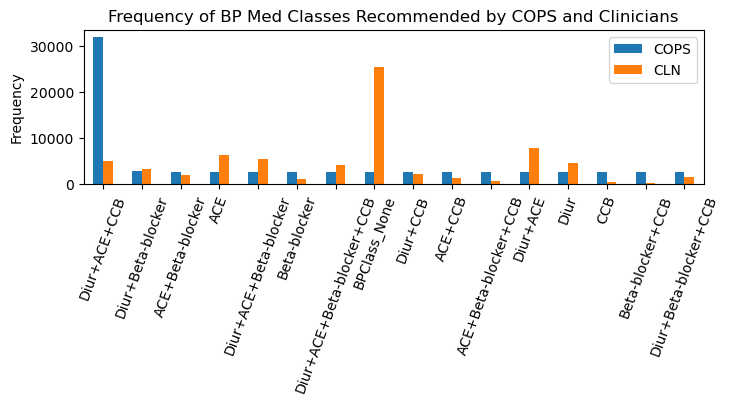


---bg---


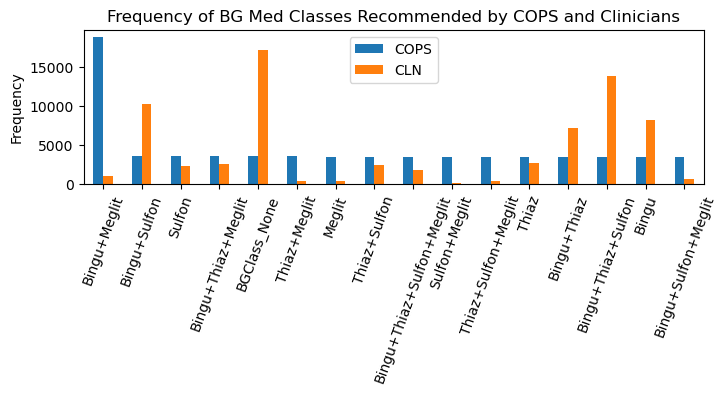


---bpbg---


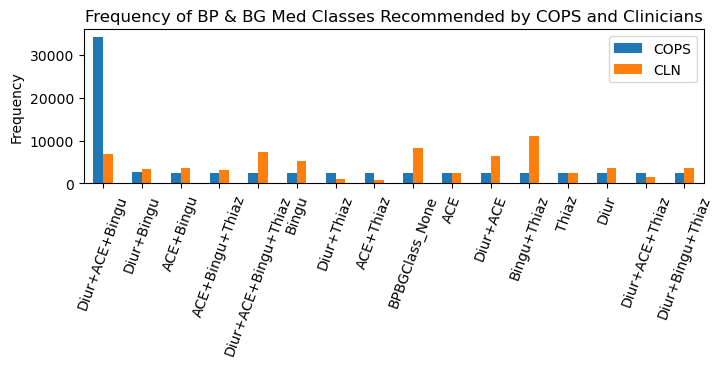

In [15]:
# use bar chart to show the frequency of med_list Column for COPS and Clinicians
import matplotlib.pyplot as plt
import seaborn as sns

def plot_med_list(df, flag):
    
    print()
    print('---{}---'.format(flag))

    # get the frequency count of each unique value in med_list Column in bp_df
    med_COPS = df['med_list'].value_counts()
    med_CLN = df['med_list_cln'].value_counts()

    # merge the two series into a dataframe
    med_df = pd.concat([med_COPS, med_CLN], axis=1)
    med_df.columns = ['COPS', 'CLN']
    # fill the NaN with 0
    med_df = med_df.fillna(0)
    # print(med_df)

    # plot the bar chart, one bar for COPS, one bar for CLN, x-axis is the index, y-axis is the frequency
    med_df.plot.bar(figsize=(8,2))
    if flag == 'bp':
        plt.title('Frequency of BP Med Classes Recommended by COPS and Clinicians')
    if flag == 'bg':
        plt.title('Frequency of BG Med Classes Recommended by COPS and Clinicians')
    if flag == 'bpbg':
        plt.title('Frequency of BP & BG Med Classes Recommended by COPS and Clinicians')

    # plt.xlabel('med_list')
    # rotate x-axis label
    plt.xticks(rotation=70)
    plt.ylabel('Frequency')
    # plt.show()

    # save the plot to pdf and png
    plt.savefig('plots/MedClass_combo_{}.pdf'.format(flag), bbox_inches='tight')
    plt.savefig('plots/MedClass_combo_{}.png'.format(flag), bbox_inches='tight', dpi=300)

    plt.show()


plot_med_list(bp_df, 'bp')
plot_med_list(bg_df, 'bg')
plot_med_list(bpbg_df, 'bpbg')

## Fig 1 2 3 - Med Class Frequency plot


---bp---
med_cops:  {'Diur': 50181, 'ACE': 50297, 'CCB': 49979, 'Beta-blocker': 21038, 'BPClass_None': 2628}
med_cln:  {'ACE': 32652, 'Diur': 33817, 'CCB': 15549, 'BPClass_None': 25387, 'Beta-blocker': 18277}
               COPS    CLN
Diur          50181  33817
ACE           50297  32652
CCB           49979  15549
Beta-blocker  21038  18277
BPClass_None   2628  25387


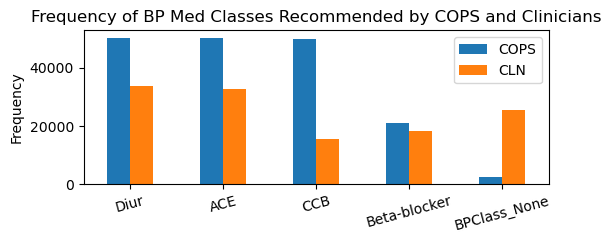


---bg---
med_cops:  {'Bingu': 43139, 'Meglit': 43216, 'Thiaz': 27870, 'Sulfon': 27965, 'BGClass_None': 3515}
med_cln:  {'BGClass_None': 17208, 'Bingu': 45336, 'Thiaz': 31121, 'Sulfon': 31686, 'Meglit': 7339}
               COPS    CLN
Bingu         43139  45336
Meglit        43216   7339
Thiaz         27870  31121
Sulfon        27965  31686
BGClass_None   3515  17208


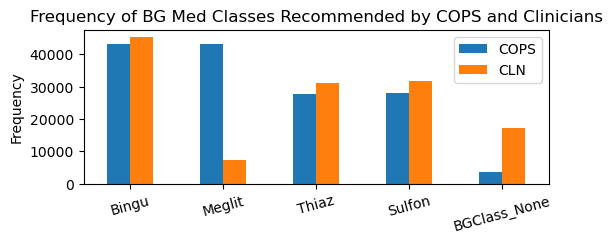


---bpbg---
med_cops:  {'Diur': 51503, 'ACE': 51487, 'Bingu': 51619, 'Thiaz': 19565, 'BPBGClass_None': 2460}
med_cln:  {'ACE': 32392, 'Diur': 34078, 'BPBGClass_None': 8261, 'Bingu': 44411, 'Thiaz': 31204}
                 COPS    CLN
Diur            51503  34078
ACE             51487  32392
Bingu           51619  44411
Thiaz           19565  31204
BPBGClass_None   2460   8261


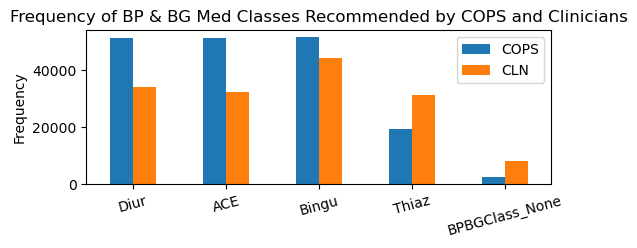

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_med_list(df, flag):
    
    print()
    print('---{}---'.format(flag))

    med_cops = dict()
    med_cln = dict()

    # loop through each row in df
    for i in range(df.shape[0]):
        row = df.iloc[i]
        m_cops = row['med_list'].split('+')
        m_cln = row['med_list_cln'].split('+')

        for m in m_cops:
            if m in med_cops:
                med_cops[m] += 1
            else:
                med_cops[m] = 1
        
        for m in m_cln:
            if m in med_cln:
                med_cln[m] += 1
            else:
                med_cln[m] = 1
    
    print('med_cops: ', med_cops)
    print('med_cln: ', med_cln)
    
    # build a dataframe from med_cops and med_cln
    med_df = pd.DataFrame([med_cops, med_cln])
    med_df = med_df.fillna(0)
    med_df = med_df.T
    med_df.columns = ['COPS', 'CLN']
    print(med_df)

    # plot the bar chart, one bar for COPS, one bar for CLN, x-axis is the index, y-axis is the frequency
    med_df.plot.bar(figsize=(6,2))
    if flag == 'bp':
        plt.title('Frequency of BP Med Classes Recommended by COPS and Clinicians')
    if flag == 'bg':
        plt.title('Frequency of BG Med Classes Recommended by COPS and Clinicians')
    if flag == 'bpbg':
        plt.title('Frequency of BP & BG Med Classes Recommended by COPS and Clinicians')

    plt.xticks(rotation=15)
    plt.ylabel('Frequency')
    # plt.show()

    # save the plot to pdf and png
    plt.savefig('plots/MedClass_{}.pdf'.format(flag), bbox_inches='tight')
    plt.savefig('plots/MedClass_{}.png'.format(flag), bbox_inches='tight', dpi=300)
    plt.show()
    

plot_med_list(bp_df, 'bp')
plot_med_list(bg_df, 'bg')
plot_med_list(bpbg_df, 'bpbg')

## Fig 1 2 3 - Success Rate

CVD Success Rate - compare with prev visit

In [17]:
# get the success rate of CVDRisk reduction 

from tqdm import tqdm

def get_cvd_success_rate(df, col_name):

    success_rate = []
    total_len = 0
    total_suc_ct = 0

    # loop through each patient in the df
    for i in tqdm(range(100001, 110252)):
        df_patient = df[df['MaskId'] == i]

        if len(df_patient) == 0:
            continue
        
        total_len += len(df_patient)
        su_ct = 0
        # loop through each visit of the patient, starting from the second visit
        for j in range(1, len(df_patient)):
            row = df_patient.iloc[j]
            prev_cvd = df_patient.iloc[j-1][col_name]
            current_cvd = row[col_name]
            if current_cvd < prev_cvd:
                su_ct += 1
        
        success_rate.append(su_ct / (len(df_patient) - 1))
        total_suc_ct += su_ct
    
    total_success_rate = total_suc_ct / total_len
    
    return total_success_rate, success_rate

cops_bp_total_success_rate, cops_bp_cvd_suc_rate = get_cvd_success_rate(bp_df, 'cvdrisk_fb')
cln_bp_total_success_rate, cln_bp_cvd_suc_rate = get_cvd_success_rate(bp_df, 'cvdrisk_fb_cln')
cops_bg_total_success_rate, cops_bg_cvd_suc_rate = get_cvd_success_rate(bg_df, 'cvdrisk_fb')
cln_bg_total_success_rate, cln_bg_cvd_suc_rate = get_cvd_success_rate(bg_df, 'cvdrisk_fb_cln')
cops_bpbg_total_success_rate, cops_bpbg_cvd_suc_rate = get_cvd_success_rate(bpbg_df, 'cvdrisk_fb')
cln_bpbg_total_success_rate, cln_bpbg_cvd_suc_rate = get_cvd_success_rate(bpbg_df, 'cvdrisk_fb_cln')

100%|██████████| 10251/10251 [00:17<00:00, 571.27it/s]


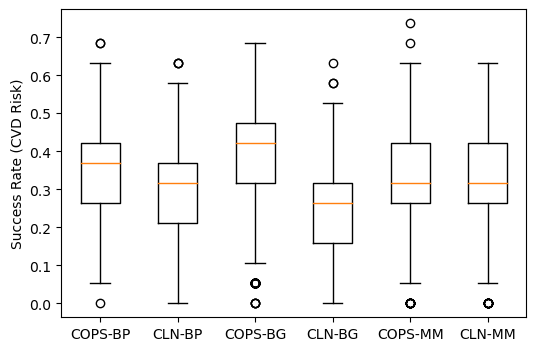

In [18]:
# plot the box plot of success rate

import matplotlib.pyplot as plt

# Combine data into a list
data = [cops_bp_cvd_suc_rate, cln_bp_cvd_suc_rate, 
        cops_bg_cvd_suc_rate, cln_bg_cvd_suc_rate,
        cops_bpbg_cvd_suc_rate, cln_bpbg_cvd_suc_rate]

# set figure size
plt.figure(figsize=(6, 4))
# Plotting the box plot
plt.boxplot(data)

# Add labels to x-axis tick marks
plt.xticks([1, 2, 3, 4, 5, 6], ['COPS-BP', 'CLN-BP',
                        'COPS-BG', 'CLN-BG',
                        'COPS-MM', 'CLN-MM'])
plt.ylabel('Success Rate (CVD Risk)')
# plt.grid()

# save the plot to pdf and png
plt.savefig('plots/CVDRisk_success_rate.pdf', bbox_inches='tight')
plt.savefig('plots/CVDRisk_success_rate.png', bbox_inches='tight', dpi=300)

plt.show()

CVD Success Rate 2 - compare with baseline 

In [19]:
# get the success rate of CVDRisk reduction, compare each visit's cvdrisk with baseline cvdrisk, instead of previous visit's cvdrisk 

from tqdm import tqdm

def get_cvd_success_rate_2(df, col_name):

    success_rate = []
    total_len = 0
    total_suc_ct = 0

    # loop through each patient in the df
    for i in tqdm(range(100001, 110252)):
        df_patient = df[df['MaskId'] == i]

        if len(df_patient) == 0:
            continue
        
        total_len += len(df_patient)
        su_ct = 0
        # loop through each visit of the patient, starting from the second visit
        for j in range(1, len(df_patient)):
            row = df_patient.iloc[j]
            base_cvd = df_patient.iloc[0][col_name]
            current_cvd = row[col_name]
            if current_cvd < base_cvd:
                su_ct += 1
        
        success_rate.append(su_ct / (len(df_patient) - 1))
        total_suc_ct += su_ct
    
    total_success_rate = total_suc_ct / total_len
    
    return total_success_rate, success_rate

cops_bp_total_success_rate_2, cops_bp_cvd_suc_rate_2 = get_cvd_success_rate_2(bp_df, 'cvdrisk_fb')
cln_bp_total_success_rate_2, cln_bp_cvd_suc_rate_2 = get_cvd_success_rate_2(bp_df, 'cvdrisk_fb_cln')
cops_bg_total_success_rate_2, cops_bg_cvd_suc_rate_2 = get_cvd_success_rate_2(bg_df, 'cvdrisk_fb')
cln_bg_total_success_rate_2, cln_bg_cvd_suc_rate_2 = get_cvd_success_rate_2(bg_df, 'cvdrisk_fb_cln')
cops_bpbg_total_success_rate_2, cops_bpbg_cvd_suc_rate_2 = get_cvd_success_rate_2(bpbg_df, 'cvdrisk_fb')
cln_bpbg_total_success_rate_2, cln_bpbg_cvd_suc_rate_2 = get_cvd_success_rate_2(bpbg_df, 'cvdrisk_fb_cln')


100%|██████████| 10251/10251 [00:17<00:00, 584.14it/s]


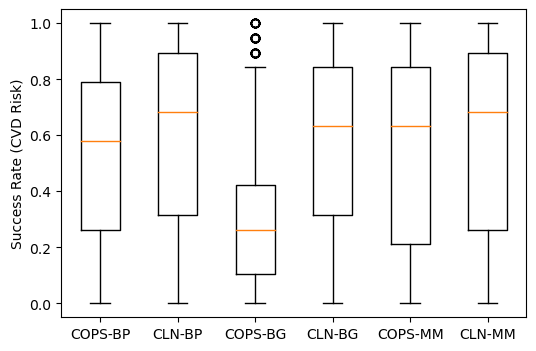

In [20]:
# plot the box plot of success rate

import matplotlib.pyplot as plt

# Combine data into a list
data = [cops_bp_cvd_suc_rate_2, cln_bp_cvd_suc_rate_2, 
        cops_bg_cvd_suc_rate_2, cln_bg_cvd_suc_rate_2,
        cops_bpbg_cvd_suc_rate_2, cln_bpbg_cvd_suc_rate_2]

# set figure size
plt.figure(figsize=(6, 4))
# Plotting the box plot
plt.boxplot(data)

# Add labels to x-axis tick marks
plt.xticks([1, 2, 3, 4, 5, 6], ['COPS-BP', 'CLN-BP',
                        'COPS-BG', 'CLN-BG',
                        'COPS-MM', 'CLN-MM'])
plt.ylabel('Success Rate (CVD Risk)')
# plt.grid()
plt.show()

SBP Violation Rate

In [21]:
# get violation rate of SBP and HbA1c

def get_sbp_violation_rate(df, col_name):

    vio_rate = []
    total_len = 0
    total_vio_ct = 0

    # loop through each patient in the df
    for i in tqdm(range(100001, 110252)):
        df_patient = df[df['MaskId'] == i]

        if len(df_patient) == 0:
            continue
        
        total_len += len(df_patient)
        vio_ct = 0
        # loop through each visit of the patient
        for j in range(len(df_patient)):
            row = df_patient.iloc[j]
            current_sbp = row[col_name]
            if current_sbp > 125 or current_sbp < 110:
                vio_ct += 1

        total_vio_ct += vio_ct
        vio_rate.append(vio_ct / (len(df_patient)))
    
    total_vio_rate = total_vio_ct / total_len
    
    return total_vio_rate, vio_rate

cops_bp_total_sbp_vio_rate, cops_bp_sbp_vio_rate = get_sbp_violation_rate(bp_df, 'sbp_fb')
cln_bp_total_sbp_vio_rate, cln_bp_sbp_vio_rate = get_sbp_violation_rate(bp_df, 'sbp_fb_cln')
cops_bg_total_sbp_vio_rate, cops_bg_sbp_vio_rate = get_sbp_violation_rate(bg_df, 'sbp_fb')
cln_bg_total_sbp_vio_rate, cln_bg_sbp_vio_rate = get_sbp_violation_rate(bg_df, 'sbp_fb_cln')
cops_bpbg_total_sbp_vio_rate, cops_bpbg_sbp_vio_rate = get_sbp_violation_rate(bpbg_df, 'sbp_fb')
cln_bpbg_total_sbp_vio_rate, cln_bpbg_sbp_vio_rate = get_sbp_violation_rate(bpbg_df, 'sbp_fb_cln') 

100%|██████████| 10251/10251 [00:11<00:00, 923.07it/s]


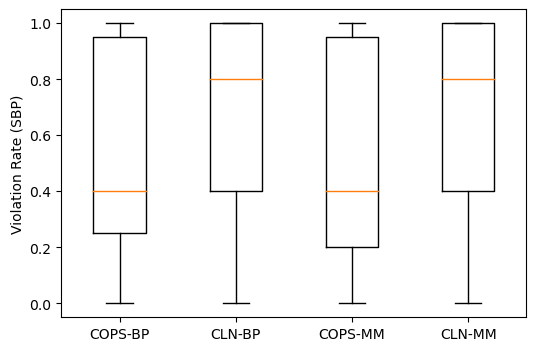

In [22]:
# plot the box plot of violation rate SBP

import matplotlib.pyplot as plt

# Combine data into a list
data = [cops_bp_sbp_vio_rate, cln_bp_sbp_vio_rate,
        # cops_bg_sbp_vio_rate, cln_bg_sbp_vio_rate,
        cops_bpbg_sbp_vio_rate, cln_bpbg_sbp_vio_rate]

# set figure size
plt.figure(figsize=(6, 4))
# Plotting the box plot
plt.boxplot(data)

# Add labels to x-axis tick marks
plt.xticks([1, 2, 3, 4, ], ['COPS-BP', 'CLN-BP',
                            'COPS-MM', 'CLN-MM'])
plt.ylabel('Violation Rate (SBP)')
# plt.grid()

# save the plot to pdf and png
plt.savefig('plots/SBP_violation_rate.pdf', bbox_inches='tight')
plt.savefig('plots/SBP_violation_rate.png', bbox_inches='tight')

plt.show()

A1C Violation Rate

/Users/tian/opt/anaconda3/envs/tf/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/tian/opt/anaconda3/envs/tf/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/tian/opt/anaconda3/envs/tf/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

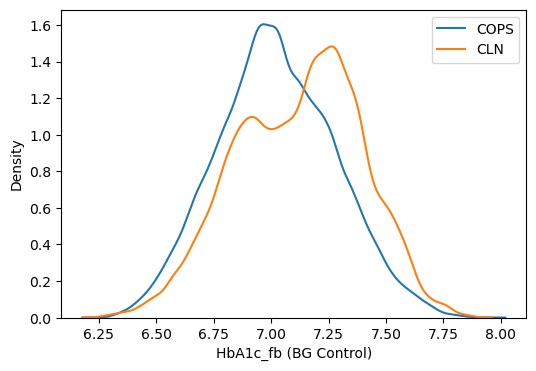

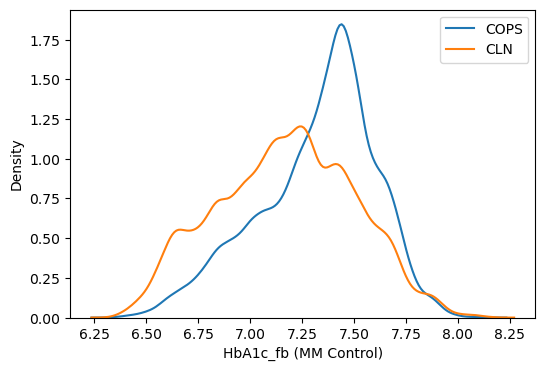

In [23]:
# plot the distribution of bg_df['hba1c_fb'] and bg_df['hba1c_fb_cln']

import matplotlib.pyplot as plt
import seaborn as sns

# set figure size
plt.figure(figsize=(6, 4))
# Plotting the box plot
sns.distplot(bg_df['hba1c_fb'], hist=False, label='COPS')
sns.distplot(bg_df['hba1c_fb_cln'], hist=False, label='CLN')
plt.xlabel('HbA1c_fb (BG Control)')
plt.legend()

# set figure size
plt.figure(figsize=(6, 4))
# Plotting the box plot
sns.distplot(bpbg_df['hba1c_fb'], hist=False, label='COPS')
sns.distplot(bpbg_df['hba1c_fb_cln'], hist=False, label='CLN')
plt.xlabel('HbA1c_fb (MM Control)')
plt.legend()

In [24]:
# get violation rate of HbA1c

def get_a1c_violation_rate(df, col_name):

    vio_rate = []
    total_len = 0
    total_vio_ct = 0

    # loop through each patient in the df
    # for i in tqdm(range(100001, 110252)):
    for i in tqdm(same_patient):
        df_patient = df[df['MaskId'] == i]

        if len(df_patient) == 0:
            continue
        
        total_len += len(df_patient)
        vio_ct = 0
        # loop through each visit of the patient
        for j in range(len(df_patient)):
            row = df_patient.iloc[j]
            current_a1c = row[col_name]
            # if current_a1c > 7.5 or current_a1c < 6.5:
            if current_a1c > 7.2 or current_a1c < 6.8:
            # if current_a1c > 7.2 or current_a1c < 7.0:

            # if current_a1c < 6.8:
                vio_ct += 1

        total_vio_ct += vio_ct
        vio_rate.append(vio_ct / (len(df_patient)))
    
    total_vio_rate = total_vio_ct / total_len
    
    return total_vio_rate, vio_rate

cops_bp_total_a1c_vio_rate, cops_bp_a1c_vio_rate = get_a1c_violation_rate(bp_df, 'hba1c_fb')
cln_bp_total_a1c_vio_rate, cln_bp_a1c_vio_rate = get_a1c_violation_rate(bp_df, 'hba1c_fb_cln')
cops_bg_total_a1c_vio_rate, cops_bg_a1c_vio_rate = get_a1c_violation_rate(bg_df, 'hba1c_fb')
cln_bg_total_a1c_vio_rate, cln_bg_a1c_vio_rate = get_a1c_violation_rate(bg_df, 'hba1c_fb_cln')
cops_bpbg_total_a1c_vio_rate, cops_bpbg_a1c_vio_rate = get_a1c_violation_rate(bpbg_df, 'hba1c_fb')
cln_bpbg_total_a1c_vio_rate, cln_bpbg_a1c_vio_rate = get_a1c_violation_rate(bpbg_df, 'hba1c_fb_cln')

100%|██████████| 3559/3559 [00:08<00:00, 403.28it/s]


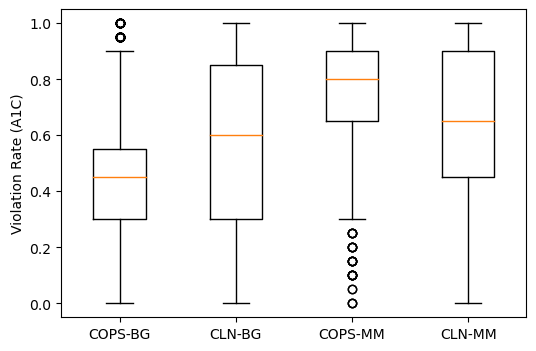

In [25]:
# plot the box plot of violation rate A1C

import matplotlib.pyplot as plt

# Combine data into a list
data = [
        # cops_bp_a1c_vio_rate, cln_bp_a1c_vio_rate,
        cops_bg_a1c_vio_rate, cln_bg_a1c_vio_rate,
        cops_bpbg_a1c_vio_rate, cln_bpbg_a1c_vio_rate]

# set figure size
plt.figure(figsize=(6, 4))
# Plotting the box plot
plt.boxplot(data)

# Add labels to x-axis tick marks
plt.xticks([1, 2, 3, 4, ], [    'COPS-BG', 'CLN-BG',
                                'COPS-MM', 'CLN-MM'])
plt.ylabel('Violation Rate (A1C)')
# plt.grid()

# save the plot to pdf and png
plt.savefig('plots/HBA1C_violation_rate.pdf', bbox_inches='tight')
plt.savefig('plots/HBA1C_violation_rate.png', bbox_inches='tight')

plt.show()

Percentiles

In [26]:
# Total CVD risk success rate
print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(cops_bp_total_success_rate_2*100, cln_bp_total_success_rate_2*100, 
                                                              cops_bg_total_success_rate_2*100, cln_bg_total_success_rate_2*100, 
                                                              cops_bpbg_total_success_rate_2*100, cln_bpbg_total_success_rate_2*100))

# CVDRisk percentiles
print("{:.2f}/{:.2f}/{:.2f}\t{:.2f}/{:.2f}/{:.2f}\t{:.2f}/{:.2f}/{:.2f}\t{:.2f}/{:.2f}/{:.2f}\t{:.2f}/{:.2f}/{:.2f}\t{:.2f}/{:.2f}/{:.2f}".format(
    np.percentile(cops_bp_cvd_suc_rate_2, 25)*100, np.percentile(cops_bp_cvd_suc_rate_2, 50)*100, np.percentile(cops_bp_cvd_suc_rate_2, 75)*100,
    np.percentile(cln_bp_cvd_suc_rate_2, 25)*100, np.percentile(cln_bp_cvd_suc_rate_2, 50)*100, np.percentile(cln_bp_cvd_suc_rate_2, 75)*100,
    np.percentile(cops_bg_cvd_suc_rate_2, 25)*100, np.percentile(cops_bg_cvd_suc_rate_2, 50)*100, np.percentile(cops_bg_cvd_suc_rate_2, 75)*100,
    np.percentile(cln_bg_cvd_suc_rate_2, 25)*100, np.percentile(cln_bg_cvd_suc_rate_2, 50)*100, np.percentile(cln_bg_cvd_suc_rate_2, 75)*100,
    np.percentile(cops_bpbg_cvd_suc_rate_2, 25)*100, np.percentile(cops_bpbg_cvd_suc_rate_2, 50)*100, np.percentile(cops_bpbg_cvd_suc_rate_2, 75)*100,
    np.percentile(cln_bpbg_cvd_suc_rate_2, 25)*100, np.percentile(cln_bpbg_cvd_suc_rate_2, 50)*100, np.percentile(cln_bpbg_cvd_suc_rate_2, 75)*100))

# Total CVD risk success rate
print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(cops_bp_total_success_rate*100, cln_bp_total_success_rate*100, 
                                                              cops_bg_total_success_rate*100, cln_bg_total_success_rate*100, 
                                                              cops_bpbg_total_success_rate*100, cln_bpbg_total_success_rate*100))

# CVDRisk percentiles
print("{:.2f}/{:.2f}/{:.2f}\t{:.2f}/{:.2f}/{:.2f}\t{:.2f}/{:.2f}/{:.2f}\t{:.2f}/{:.2f}/{:.2f}\t{:.2f}/{:.2f}/{:.2f}\t{:.2f}/{:.2f}/{:.2f}".format(
    np.percentile(cops_bp_cvd_suc_rate, 25)*100, np.percentile(cops_bp_cvd_suc_rate, 50)*100, np.percentile(cops_bp_cvd_suc_rate, 75)*100,
    np.percentile(cln_bp_cvd_suc_rate, 25)*100, np.percentile(cln_bp_cvd_suc_rate, 50)*100, np.percentile(cln_bp_cvd_suc_rate, 75)*100,
    np.percentile(cops_bg_cvd_suc_rate, 25)*100, np.percentile(cops_bg_cvd_suc_rate, 50)*100, np.percentile(cops_bg_cvd_suc_rate, 75)*100,
    np.percentile(cln_bg_cvd_suc_rate, 25)*100, np.percentile(cln_bg_cvd_suc_rate, 50)*100, np.percentile(cln_bg_cvd_suc_rate, 75)*100,
    np.percentile(cops_bpbg_cvd_suc_rate, 25)*100, np.percentile(cops_bpbg_cvd_suc_rate, 50)*100, np.percentile(cops_bpbg_cvd_suc_rate, 75)*100,
    np.percentile(cln_bpbg_cvd_suc_rate, 25)*100, np.percentile(cln_bpbg_cvd_suc_rate, 50)*100, np.percentile(cln_bpbg_cvd_suc_rate, 75)*100))

# Total SBP violation rate
print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(cops_bp_total_sbp_vio_rate*100, cln_bp_total_sbp_vio_rate*100,
                                                              cops_bg_total_sbp_vio_rate*100, cln_bg_total_sbp_vio_rate*100,
                                                              cops_bpbg_total_sbp_vio_rate*100, cln_bpbg_total_sbp_vio_rate*100))

# SBP percentiles
print("{:.2f}/{:.2f}/{:.2f}\t{:.2f}/{:.2f}/{:.2f}\t{:.2f}/{:.2f}/{:.2f}\t{:.2f}/{:.2f}/{:.2f}\t{:.2f}/{:.2f}/{:.2f}\t{:.2f}/{:.2f}/{:.2f}".format(
    np.percentile(cops_bp_sbp_vio_rate, 25)*100, np.percentile(cops_bp_sbp_vio_rate, 50)*100, np.percentile(cops_bp_sbp_vio_rate, 75)*100,
    np.percentile(cln_bp_sbp_vio_rate, 25)*100, np.percentile(cln_bp_sbp_vio_rate, 50)*100, np.percentile(cln_bp_sbp_vio_rate, 75)*100,
    np.percentile(cops_bg_sbp_vio_rate, 25)*100, np.percentile(cops_bg_sbp_vio_rate, 50)*100, np.percentile(cops_bg_sbp_vio_rate, 75)*100,
    np.percentile(cln_bg_sbp_vio_rate, 25)*100, np.percentile(cln_bg_sbp_vio_rate, 50)*100, np.percentile(cln_bg_sbp_vio_rate, 75)*100,
    np.percentile(cops_bpbg_sbp_vio_rate, 25)*100, np.percentile(cops_bpbg_sbp_vio_rate, 50)*100, np.percentile(cops_bpbg_sbp_vio_rate, 75)*100,
    np.percentile(cln_bpbg_sbp_vio_rate, 25)*100, np.percentile(cln_bpbg_sbp_vio_rate, 50)*100, np.percentile(cln_bpbg_sbp_vio_rate, 75)*100))

# Total HbA1c violation rate
print("{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(cops_bp_total_a1c_vio_rate*100, cln_bp_total_a1c_vio_rate*100,
                                                              cops_bg_total_a1c_vio_rate*100, cln_bg_total_a1c_vio_rate*100,
                                                              cops_bpbg_total_a1c_vio_rate*100, cln_bpbg_total_a1c_vio_rate*100))

# HbA1c percentiles
print("{:.2f}/{:.2f}/{:.2f}\t{:.2f}/{:.2f}/{:.2f}\t{:.2f}/{:.2f}/{:.2f}\t{:.2f}/{:.2f}/{:.2f}\t{:.2f}/{:.2f}/{:.2f}\t{:.2f}/{:.2f}/{:.2f}".format(
    np.percentile(cops_bp_a1c_vio_rate, 25)*100, np.percentile(cops_bp_a1c_vio_rate, 50)*100, np.percentile(cops_bp_a1c_vio_rate, 75)*100,
    np.percentile(cln_bp_a1c_vio_rate, 25)*100, np.percentile(cln_bp_a1c_vio_rate, 50)*100, np.percentile(cln_bp_a1c_vio_rate, 75)*100,
    np.percentile(cops_bg_a1c_vio_rate, 25)*100, np.percentile(cops_bg_a1c_vio_rate, 50)*100, np.percentile(cops_bg_a1c_vio_rate, 75)*100,
    np.percentile(cln_bg_a1c_vio_rate, 25)*100, np.percentile(cln_bg_a1c_vio_rate, 50)*100, np.percentile(cln_bg_a1c_vio_rate, 75)*100,
    np.percentile(cops_bpbg_a1c_vio_rate, 25)*100, np.percentile(cops_bpbg_a1c_vio_rate, 50)*100, np.percentile(cops_bpbg_a1c_vio_rate, 75)*100,
    np.percentile(cln_bpbg_a1c_vio_rate, 25)*100, np.percentile(cln_bpbg_a1c_vio_rate, 50)*100, np.percentile(cln_bpbg_a1c_vio_rate, 75)*100))

50.91	56.24	27.22	54.43	50.43	54.35
26.32/57.89/78.95	31.58/68.42/89.47	10.53/26.32/42.11	31.58/63.16/84.21	21.05/63.16/84.21	26.32/68.42/89.47
33.91	27.47	37.75	22.93	31.50	30.04
26.32/36.84/42.11	21.05/31.58/36.84	31.58/42.11/47.37	15.79/26.32/31.58	26.32/31.58/42.11	26.32/31.58/42.11
49.83	66.32	97.14	98.19	52.02	67.72
25.00/40.00/95.00	40.00/80.00/100.00	100.00/100.00/100.00	100.00/100.00/100.00	20.00/40.00/95.00	40.00/80.00/100.00
68.46	49.42	44.92	55.84	76.15	63.41
55.00/75.00/90.00	15.00/50.00/85.00	30.00/45.00/55.00	30.00/60.00/85.00	65.00/80.00/90.00	45.00/65.00/90.00


### SBP Success

In [27]:
# # get the success rate of CVDRisk reduction 
# from tqdm import tqdm

# def get_sbp_success_rate(df):

#     success_rate = []

#     # loop through each patient in the df
#     for i in tqdm(range(100001, 110252)):
#         df_patient = df[df['MaskId'] == i]

#         if len(df_patient) == 0:
#             continue
        
#         su_ct = 0
#         # loop through each visit of the patient
#         for j in range(len(df_patient)):
#             row = df_patient.iloc[j]
#             current_sbp = row['sbp_fb']
#             if current_sbp < 125 and current_sbp >= 110:
#                 su_ct += 1
        
#         success_rate.append(su_ct / (len(df_patient)))
    
#     return success_rate

# bp_sbp_suc_rate = get_sbp_success_rate(bp_df)
# bg_sbp_suc_rate = get_sbp_success_rate(bg_df)
# bpbg_sbp_suc_rate = get_sbp_success_rate(bpbg_df)

# print('bp_sbp_suc_rate: ', bp_sbp_suc_rate)
# print('bg_sbp_suc_rate: ', bg_sbp_suc_rate)
# print('bpbg_sbp_suc_rate: ', bpbg_sbp_suc_rate)

In [28]:
# # plot the box plot of success rate, one for bp, one for bg, one for bpbg
# import matplotlib.pyplot as plt

# # Combine data into a list
# data = [bp_sbp_suc_rate, bpbg_sbp_suc_rate]

# plt.figure(figsize=(6, 4))
# # Plotting the box plot
# plt.boxplot(data)

# # Add labels to x-axis tick marks
# plt.xticks([1, 2], ['COPS-BP', 'COPS-MM'])
# plt.ylabel('Success Rate (SBP)')
# plt.grid()
# plt.show()

### A1C

In [29]:
# # get the success rate of CVDRisk reduction 
# from tqdm import tqdm

# def get_a1c_success_rate(df):

#     success_rate = []

#     # loop through each patient in the df
#     for i in tqdm(range(100001, 110252)):
#         df_patient = df[df['MaskId'] == i]

#         if len(df_patient) == 0:
#             continue
        
#         su_ct = 0
#         # loop through each visit of the patient
#         for j in range(len(df_patient)):
#             row = df_patient.iloc[j]
#             current_a1c = row['hba1c_fb']
#             if current_a1c <= 7.9  and current_a1c >= 7.0:
#                 su_ct += 1
        
#         success_rate.append(su_ct / (len(df_patient)))
    
#     return success_rate

# bg_a1c_suc_rate = get_a1c_success_rate(bg_df)
# bpbg_a1c_suc_rate = get_a1c_success_rate(bpbg_df)

# print('bg_a1c_suc_rate: ', bg_a1c_suc_rate)
# print('bpbg_a1c_suc_rate: ', bpbg_a1c_suc_rate)

In [30]:
# # plot the box plot of success rate, one for bp, one for bg, one for bpbg
# import matplotlib.pyplot as plt

# # Combine data into a list
# data = [bg_a1c_suc_rate, bpbg_a1c_suc_rate]

# plt.figure(figsize=(6, 4))
# # Plotting the box plot
# plt.boxplot(data)

# # Add labels to x-axis tick marks
# plt.xticks([1, 2], ['COPS-BG', 'COPS-MM'])
# plt.ylabel('Success Rate (A1C)')
# plt.grid()
# plt.show()

## Med Frequency over Success and Failure data

In [31]:
# get the success and failed data by Clincian

def get_success_data(df):

    print('df.shape: ', df.shape)
    suc_data = []
    fail_data = []

    # loop through each row in the df
    for i in tqdm(range(df.shape[0])):
        row = df.iloc[i]
        if i%20 == 0: # first visit of each patient
            suc_data.append(row)
            fail_data.append(row)
        else:
            prev_row = df.iloc[i-1]
            if row['cvdrisk_fb_cln'] < prev_row['cvdrisk_fb_cln']:
                suc_data.append(row)
            else:
                fail_data.append(row)
    
    success_df = pd.DataFrame(suc_data)
    print('success_df.shape: ', success_df.shape)

    fail_df = pd.DataFrame(fail_data)
    print('fail_df.shape: ', fail_df.shape)

    return success_df, fail_df


bp_df_suc, bp_df_fail = get_success_data(bp_df)
bg_df_suc, bg_df_fail = get_success_data(bg_df)
bpbg_df_suc, bpbg_df_fail = get_success_data(bpbg_df)

df.shape:  (71180, 23)


100%|██████████| 71180/71180 [00:16<00:00, 4406.70it/s]


success_df.shape:  (23115, 23)
fail_df.shape:  (51624, 23)
df.shape:  (71180, 23)


100%|██████████| 71180/71180 [00:15<00:00, 4671.04it/s]


success_df.shape:  (19884, 23)
fail_df.shape:  (54855, 23)
df.shape:  (71180, 23)


100%|██████████| 71180/71180 [00:15<00:00, 4548.82it/s]


success_df.shape:  (24938, 23)
fail_df.shape:  (49801, 23)



---BP---
med_cops:  {'Diur': 16861, 'ACE': 16998, 'CCB': 16938, 'Beta-blocker': 6196, 'BPClass_None': 732}
med_cln:  {'ACE': 14445, 'Diur': 14397, 'CCB': 6857, 'BPClass_None': 3993, 'Beta-blocker': 6467}


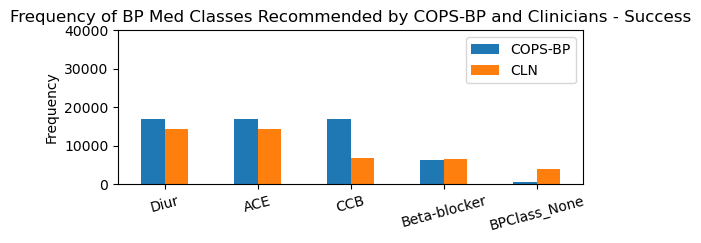


---BP---
med_cops:  {'Diur': 36879, 'ACE': 36858, 'CCB': 36600, 'Beta-blocker': 14842, 'BPClass_None': 1896}
med_cln:  {'ACE': 20645, 'Diur': 21345, 'CCB': 9509, 'Beta-blocker': 12800, 'BPClass_None': 21722}


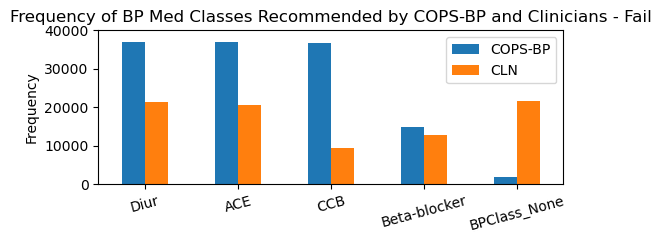

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_med_list_2(df, flag, dataset):
    
    print()
    print('---{}---'.format(flag))

    med_cops = dict()
    med_cln = dict()

    # loop through each row in df
    for i in range(df.shape[0]):
        row = df.iloc[i]
        m_cops = row['med_list'].split('+')
        m_cln = row['med_list_cln'].split('+')

        for m in m_cops:
            if m in med_cops:
                med_cops[m] += 1
            else:
                med_cops[m] = 1
        
        for m in m_cln:
            if m in med_cln:
                med_cln[m] += 1
            else:
                med_cln[m] = 1
    
    print('med_cops: ', med_cops)
    print('med_cln: ', med_cln)
    
    # build a dataframe from med_cops and med_cln
    med_df = pd.DataFrame([med_cops, med_cln])
    med_df = med_df.fillna(0)
    med_df = med_df.T
    med_df.columns = ['COPS-{}'.format(flag), 'CLN']
    # print(med_df)

    med_df.plot.bar(figsize=(6,2))
    plt.legend(loc='upper right')
    # set y-axis range
    plt.ylim(0, 40000)

    # plot the bar chart, one bar for COPS, one bar for CLN, x-axis is the index, y-axis is the frequency
    if flag == 'BP':
        plt.title('Frequency of BP Med Classes Recommended by COPS-{} and Clinicians - {}'.format(flag, dataset))
    if flag == 'BG':
        plt.title('Frequency of BG Med Classes Recommended by COPS-{} and Clinicians - {}'.format(flag, dataset))
    if flag == 'MM':
        plt.title('Frequency of BP & BG Med Classes Recommended by COPS-{} and Clinicians - {}'.format(flag, dataset))         

    plt.xticks(rotation=15)
    plt.ylabel('Frequency')

    # save the plot to pdf and png
    plt.savefig('plots/MedClasses_{}_{}.pdf'.format(flag, dataset), bbox_inches='tight')
    plt.savefig('plots/MedClasses_{}_{}.png'.format(flag, dataset), bbox_inches='tight', dpi=300)   

    plt.show()
    

plot_med_list_2(bp_df_suc, 'BP', 'Success')
plot_med_list_2(bp_df_fail, 'BP', 'Fail')



---BG---
med_cops:  {'Bingu': 13095, 'Meglit': 13125, 'Thiaz': 6786, 'Sulfon': 6769, 'BGClass_None': 853}
med_cln:  {'BGClass_None': 4441, 'Bingu': 13930, 'Thiaz': 6420, 'Sulfon': 7698, 'Meglit': 2381}


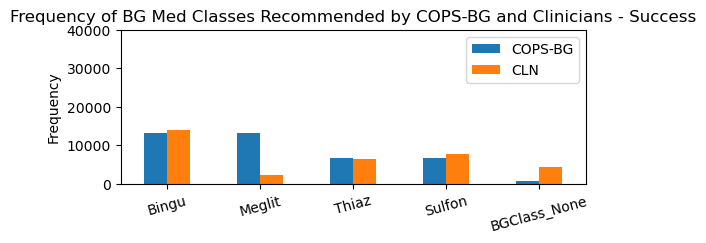


---BG---
med_cops:  {'Bingu': 33603, 'Meglit': 33650, 'Thiaz': 21084, 'Sulfon': 21196, 'BGClass_None': 2662}
med_cln:  {'BGClass_None': 13103, 'Bingu': 34063, 'Thiaz': 26116, 'Sulfon': 25983, 'Meglit': 5069}


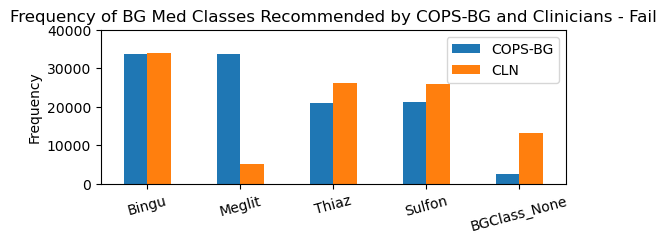

In [33]:
plot_med_list_2(bg_df_suc, 'BG', 'Success')
plot_med_list_2(bg_df_fail, 'BG', 'Fail')


---MM---
med_cops:  {'Diur': 18653, 'ACE': 18642, 'Bingu': 18682, 'Thiaz': 6313, 'BPBGClass_None': 781}
med_cln:  {'ACE': 15856, 'Diur': 15981, 'BPBGClass_None': 1564, 'Bingu': 16696, 'Thiaz': 9544}


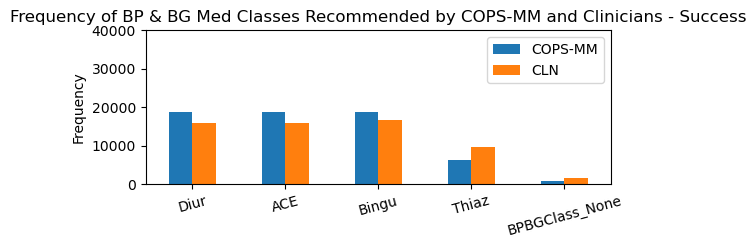


---MM---
med_cops:  {'Diur': 36409, 'ACE': 36404, 'Bingu': 36496, 'Thiaz': 13252, 'BPBGClass_None': 1679}
med_cln:  {'ACE': 18974, 'Diur': 20022, 'BPBGClass_None': 6777, 'Bingu': 30372, 'Thiaz': 23075}


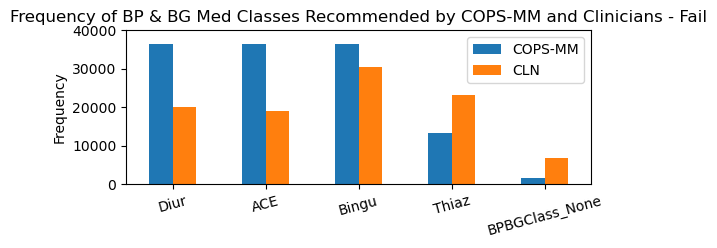

In [34]:
plot_med_list_2(bpbg_df_suc, 'MM', 'Success')
plot_med_list_2(bpbg_df_fail, 'MM', 'Fail')